In [38]:
from pathlib import Path
import pandas as pd

In [39]:
filepath = "/home/viktor/Documents/kaggle/kaggle_llm/data/kaggle-llm-science-exam/train.csv"
file_name = filepath.split("/")[-1].split(".")[0]
print(file_name)
csv = pd.read_csv(filepath, index_col=0)
csv.head()

train


,prompt,A,B,C,D,E,answer
id,,,,,,,
0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D
1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A
2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A
3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C
4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D


In [40]:
len(csv)

200

In [4]:
filepath_2 = "/home/viktor/Documents/kaggle/kaggle_llm/data/kaggle-datasets/15k-high-quality-examples/15k_gpt3.5-turbo.csv"
csv_2 = pd.read_csv(filepath_2)
csv_2.head()

,prompt,A,B,C,D,E,answer
0,Who was responsible for the reorganisation of ...,Territorial brigades,First line divisions,Training Reserve,Second line divisions,British home army,C
1,What film earned Rakshit Shetty the Karnataka ...,Rakshit Shetty did not win the Karnataka State...,Nam Areal Ondina,Ulidavaru Kandanthe,The information is not provided in the Wikiped...,Simple Agi Ondh Love Story,C
2,What is the population of Maklavan?,"Maklavan has a population of 5,000 individuals...","Maklavan has a population of 1,500 individuals...","Maklavan has a population of 2,800 individuals...","Maklavan has a population of 3,800 individuals...","Maklavan has a population of 2,170 individuals...",E
3,What was the stud fee for Empire Maker at Gain...,"$90,000","$120,000","$85,000","$100,000","$75,000",D
4,What books has Brian J. Bowe published for Ens...,"Books about The Ramones, The Clash, and Judas ...","Books about The Ramones, The MC5, and Was (Not...","Books about The Ramones, The Clash, and The MC5.","Books about The Clash, The Stooges, and Judas ...","Books about The Stooges, The MC5, and Was (Not...",A


In [5]:
len(csv_2)

15000

In [6]:
# csv = pd.concat([csv, csv_2]).sample(frac=1).reset_index(drop=True)
# csv['id'] = csv.index
# csv

In [41]:
# replace NaN with "None"
csv = csv.fillna("None")

In [42]:
# "Which rows have 'What are the vascular bundles found in' in column 'prompt'?
csv[csv["prompt"].str.contains("What are the vascular bundles found in")]


,prompt,A,B,C,D,E,answer
id,,,,,,,


In [43]:
len(csv)

200

['D' 'A' 'C' 'B' 'E']


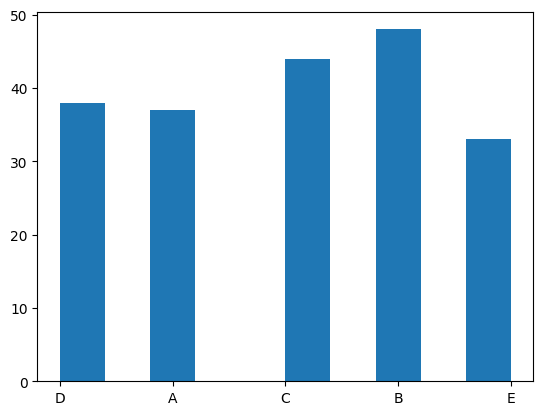

In [44]:
import matplotlib.pyplot as plt

print(csv['answer'].unique())

# remove A5III from answer
csv = csv[csv['answer'] != 'A5III']


plt.hist(csv['answer'].values);

In [45]:
import pandas as pd
import numpy as np

def shuffle_answers(df):
    # Shuffle answers
    answers = ['A', 'B', 'C', 'D', 'E']

    for idx, row in df.iterrows():
        current_answer = row['answer']
        
        # Choose a new answer that's different from the current answer
        new_answer = np.random.choice([ans for ans in answers if ans != current_answer])
        
        # Swap the text from the current answer to the new answer and vice-versa
        df.at[idx, current_answer], df.at[idx, new_answer] = df.at[idx, new_answer], df.at[idx, current_answer]
        
        # Update the answer column with the new answer
        df.at[idx, 'answer'] = new_answer


    return df

In [46]:
# Sample DataFrame
data = {
    'id': [1, 2, 3, 4, 5],
    'prompt': ['q1', 'q2', 'q3', 'q4', 'q5'],
    'A': ['text1', 'text2', 'text3', 'text4', 'text5'],
    'B': ['text6', 'text7', 'text8', 'text9', 'text10'],
    'C': ['text11', 'text12', 'text13', 'text14', 'text15'],
    'D': ['text16', 'text17', 'text18', 'text19', 'text20'],
    'E': ['text21', 'text22', 'text23', 'text24', 'text25'],
    'answer': ['A', 'B', 'B', 'A', 'C'],
    'cluster number': [1, 2, 1, 3, 2],
    'round': [1, 1, 2, 2, 3]
}

df = pd.DataFrame(data)
df

,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,q1,text1,text6,text11,text16,text21,A,1,1
1,2,q2,text2,text7,text12,text17,text22,B,2,1
2,3,q3,text3,text8,text13,text18,text23,B,1,2
3,4,q4,text4,text9,text14,text19,text24,A,3,2
4,5,q5,text5,text10,text15,text20,text25,C,2,3


In [47]:

df = shuffle_answers(df)
df


,id,prompt,A,B,C,D,E,answer,cluster number,round
0,1,q1,text6,text1,text11,text16,text21,B,1,1
1,2,q2,text2,text12,text7,text17,text22,C,2,1
2,3,q3,text3,text13,text8,text18,text23,C,1,2
3,4,q4,text19,text9,text14,text4,text24,D,3,2
4,5,q5,text5,text10,text25,text20,text15,E,2,3


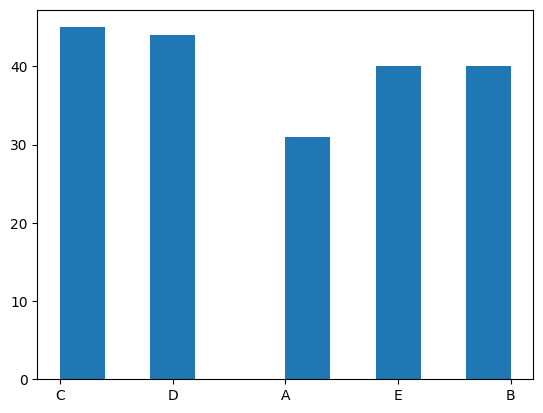

In [48]:
csv = shuffle_answers(csv)

plt.hist(csv['answer'].values);

In [49]:
csv

,prompt,A,B,C,D,E,answer
id,,,,,,,
0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that explains the missing bar...,MOND is a theory that eliminates the observed ...,C
1,Which of the following is an accurate definiti...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the evolution of sel...,D
2,Which of the following statements accurately d...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,D
3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,A
4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,E
...,...,...,...,...,...,...,...
195,What is the relation between the three moment ...,The three moment theorem describes the relatio...,The three moment theorem is used to calculate ...,The three moment theorem expresses the relatio...,The three moment theorem is used to calculate ...,The three moment theorem is used to derive the...,A
196,"What is the throttling process, and why is it ...",The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,The throttling process is a steady adiabatic f...,The throttling process is a steady flow of a f...,The throttling process is a steady adiabatic f...,C
197,What happens to excess base metal as a solutio...,"The excess base metal will often solidify, bec...","The excess base metal will often dissolve, bec...",The excess base metal will often crystallize-o...,"The excess base metal will often liquefy, beco...","The excess base metal will often evaporate, be...",C


# Experiment with embeddings

In [51]:
from sentence_transformers import SentenceTransformer

model_name = "BAAI/bge-large-en"

model = SentenceTransformer(model_name)

In [52]:
csv['prompt_joined'] = csv[['prompt', 'A', 'B', 'C', 'D', 'E']].apply(lambda x: x['prompt'] + " " + x['A'] + " " + x['B'] + " " + x['C'] + " " + x['D'] + " " + x['E'], axis=1)


In [53]:
csv['embd_prompt'] = csv['prompt_joined'].apply(lambda x: model.encode(x, normalize_embeddings=True))

In [54]:
csv.head()

,prompt,A,B,C,D,E,answer,prompt_joined,embd_prompt
id,,,,,,,,,
0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that explains the missing bar...,MOND is a theory that eliminates the observed ...,C,Which of the following statements accurately d...,"[-0.008270629, 0.006298679, -0.016664745, 0.02..."
1,Which of the following is an accurate definiti...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the evolution of sel...,D,Which of the following is an accurate definiti...,"[-0.0023720644, 0.014086207, 0.011235354, 0.01..."
2,Which of the following statements accurately d...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,D,Which of the following statements accurately d...,"[-0.014039354, -0.0063830204, 0.008411448, -0...."
3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,A,What is the significance of regularization in ...,"[0.007066282, 0.007916889, 0.026408227, 0.0198..."
4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,E,Which of the following statements accurately d...,"[-0.0073350007, -0.0017528787, 0.0033980804, -..."


In [55]:
wiki_sci = pd.read_parquet("../data/wikipedia_pages2_w_embd/wiki_sci_embd_clusters.parquet")
print("len wiki_sci:", len(wiki_sci))
wiki_sci.head()

len wiki_sci: 131049


,text,url,title,embd_text,embd_title,text_length,cluster_text,cluster_title
0,The Ulakhan Fault is a left-lateral moving tra...,https://en.wikipedia.org/wiki/Ulakhan%20Fault,Ulakhan Fault,"[-0.010125404, 0.045413326, -0.0055074026, 0.0...","[-0.027042245, 0.02827163, -0.007891712, -0.01...",948,789,144
1,Tripodal ligands are tri- and tetradentate lig...,https://en.wikipedia.org/wiki/Tripodal%20ligand,Tripodal ligand,"[-0.008397752, -0.007900611, 0.028120818, 0.02...","[0.0025610395, -0.0058939615, 0.015708892, 0.0...",1313,1,510
2,WASP-14b is an extrasolar planet discovered in...,https://en.wikipedia.org/wiki/WASP-14b,WASP-14b,"[0.021130525, 0.019535448, 0.028013904, -0.006...","[0.02375302, 0.011801232, 0.02509789, 0.001614...",852,334,499
3,Long-acting reversible contraceptives (LARC) a...,https://en.wikipedia.org/wiki/Long-acting%20re...,Long-acting reversible contraception,"[-0.014279559, -0.005928753, -0.02585963, 0.01...","[0.0039009643, 0.0050253584, -0.0144014275, 0....",9431,15,326
4,"AIDS (""acquired immune deficiency syndrome"") i...",https://en.wikipedia.org/wiki/HIV%20integration,HIV integration,"[-0.02654824, -0.008117266, -0.0044153593, 0.0...","[-0.0016449259, -0.004117463, -0.02023814, 0.0...",10557,7,895


In [56]:
idx = 0

example_vector = csv.iloc[idx]['embd_prompt']
example_text = csv.iloc[idx]['prompt']

print(example_text[:1000])

def dot_product(vec_1, vec_2):
    return np.dot(vec_1, vec_2)

wiki_sci['dot_product'] = wiki_sci['embd_text'].apply(lambda x: dot_product(x, example_vector))
# take top 3 values of dot product
wiki_sci.sort_values(by=['dot_product'], ascending=False).head(10)

Which of the following statements accurately describes the impact of Modified Newtonian Dynamics (MOND) on the observed "missing baryonic mass" discrepancy in galaxy clusters?


,text,url,title,embd_text,embd_title,text_length,cluster_text,cluster_title,dot_product
3167,According to modern models of physical cosmolo...,https://en.wikipedia.org/wiki/Dark%20matter%20...,Dark matter halo,"[-0.008592479, 0.015115932, 0.010995762, -0.00...","[0.0027527134, 0.016035685, -0.0038815672, -0....",9998,52,734,0.859298
14552,Bimetric gravity or bigravity refers to two di...,https://en.wikipedia.org/wiki/Bimetric%20gravity,Bimetric gravity,"[-0.010126477, -0.0039181327, 0.021617258, 0.0...","[0.009419641, 0.025398197, -0.00063531776, -0....",8554,801,846,0.857506
22895,"In astronomy and cosmology, baryonic dark matt...",https://en.wikipedia.org/wiki/Baryonic%20dark%...,Baryonic dark matter,"[-0.00507779, -0.008431914, -0.004464291, -0.0...","[0.023170544, 0.019461261, 0.006458448, -0.008...",1998,52,734,0.855557
9129,"Particle Dark Matter: Observations, Models and...",https://en.wikipedia.org/wiki/Particle%20Dark%...,Particle Dark Matter,"[-0.0054300446, 0.00641902, -0.0015693643, 0.0...","[0.008759871, 0.011914885, -0.0092870565, 0.00...",2908,817,856,0.850882
13822,{{DISPLAYTITLE:f(R) gravity}}\n() is a type of...,https://en.wikipedia.org/wiki/F%28R%29%20gravity,F(R) gravity,"[-0.022532206, 0.005275946, 0.009322687, 0.011...","[0.005596944, 0.0076609203, -0.0067991507, -0....",9572,801,846,0.848358
5802,"Tensor–vector–scalar gravity (TeVeS), develope...",https://en.wikipedia.org/wiki/Tensor%E2%80%93v...,Tensor–vector–scalar gravity,"[-0.024406865, 0.021109916, 0.016731633, 0.018...","[0.00262411, 0.025079714, -0.008323049, -0.003...",5728,801,846,0.847401
99,"In cosmology, the missing baryon problem is an...",https://en.wikipedia.org/wiki/Missing%20baryon...,Missing baryon problem,"[-0.0050511663, 0.008869274, 0.013651891, 0.01...","[0.021897336, 0.011040973, -0.008347422, 0.000...",9671,52,856,0.845224
4260,Mixed dark matter (MDM) is a dark matter (DM) ...,https://en.wikipedia.org/wiki/Mixed%20dark%20m...,Mixed dark matter,"[-0.021286795, 0.0062145325, 0.008406134, 0.03...","[0.005240531, 0.014575695, 0.0064398614, 0.000...",1979,52,734,0.845041
18848,AQUAL is a theory of gravity based on Modified...,https://en.wikipedia.org/wiki/AQUAL,AQUAL,"[-0.0025013406, 0.0038326539, 0.007289813, 0.0...","[-0.0002659309, -0.0048864353, -0.0043253396, ...",1644,801,206,0.843151
3704,Warm dark matter (WDM) is a hypothesized form ...,https://en.wikipedia.org/wiki/Warm%20dark%20ma...,Warm dark matter,"[-0.0077018295, 0.01613682, 0.00043503923, 0.0...","[0.016394153, 0.021226937, 0.005620362, 0.0026...",2756,817,734,0.840541


In [57]:
idx = 1

example_vector = csv.iloc[idx]['embd_prompt']
example_text = csv.iloc[idx]['prompt']

print(example_text[:1000])

def dot_product(vec_1, vec_2):
    return np.dot(vec_1, vec_2)

wiki_sci['dot_product'] = wiki_sci['embd_text'].apply(lambda x: dot_product(x, example_vector))
# take top 3 values of dot product
wiki_sci.sort_values(by=['dot_product'], ascending=False).head(10)

Which of the following is an accurate definition of dynamic scaling in self-similar systems?


,text,url,title,embd_text,embd_title,text_length,cluster_text,cluster_title,dot_product
4792,"\n \n\nIn mathematics, a self-similar object i...",https://en.wikipedia.org/wiki/Self-similarity,Self-similarity,"[-0.010780813, 0.005928294, 0.030270474, 0.002...","[0.021226909, 0.013336871, 0.022459628, -0.025...",5314,733,258,0.856883
16506,Structured criticality is a property of comple...,https://en.wikipedia.org/wiki/Structured%20cri...,Structured criticality,"[-0.012268423, -0.004525883, 0.009403295, -0.0...","[0.0075785415, 0.017324295, -0.0034406853, -0....",2905,943,285,0.843713
3147,In the context of the physical and mathematica...,https://en.wikipedia.org/wiki/Percolation%20cr...,Percolation critical exponents,"[-0.018779708, 0.012732707, 0.023872841, 0.017...","[0.004162876, 0.023679702, 0.012308919, 0.0164...",9107,943,741,0.833423
16832,"In science, e-folding is the time interval in ...",https://en.wikipedia.org/wiki/E-folding,E-folding,"[-0.019641504, 0.016564693, 0.027515, 0.021958...","[-0.008294605, -0.012581786, 0.006691381, -0.0...",4261,943,285,0.833345
16358,Similitude is a concept applicable to the test...,https://en.wikipedia.org/wiki/Similitude,Similitude,"[0.0034161496, 0.017947985, 0.035521936, 0.018...","[0.025370248, 0.010079605, 0.022481335, 0.0040...",9196,153,711,0.832983
15345,In the mathematical field of dynamical systems...,https://en.wikipedia.org/wiki/Random%20dynamic...,Random dynamical system,"[-0.025495667, 0.020739513, 0.033602662, 5.515...","[-0.020487105, 0.024603894, 0.012313597, 0.000...",5426,645,741,0.832806
6830,In the study of partial differential equations...,https://en.wikipedia.org/wiki/Self-similar%20s...,Self-similar solution,"[0.002028159, 0.013241128, 0.047978383, -0.011...","[0.018167006, 0.025810447, 0.027253868, -0.015...",3570,130,219,0.831769
16953,"In mathematics, the attractor of a random dyna...",https://en.wikipedia.org/wiki/Pullback%20attra...,Pullback attractor,"[-0.025197513, 0.015212621, 0.004925493, 0.008...","[-0.010489888, 0.029403027, -0.010566542, -0.0...",3759,645,978,0.831435
14647,Critical exponents describe the behavior of ph...,https://en.wikipedia.org/wiki/Critical%20exponent,Critical exponent,"[-0.0059373714, -0.005059884, 0.020405885, 0.0...","[0.008445334, 0.009634485, 0.0076801935, -0.00...",9348,943,741,0.831049
534,"Self-perpetuation, the capability of something...",https://en.wikipedia.org/wiki/Self-perpetuation,Self-perpetuation,"[-0.02033938, -0.0037547825, -0.00082777586, -...","[-0.008029024, -0.0013458491, -0.0143561615, -...",1808,793,569,0.830916


In [58]:
idx = 2

example_vector = csv.iloc[idx]['embd_prompt']
example_text = csv.iloc[idx]['prompt']

print(example_text[:1000])

def dot_product(vec_1, vec_2):
    return np.dot(vec_1, vec_2)

wiki_sci['dot_product'] = wiki_sci['embd_text'].apply(lambda x: dot_product(x, example_vector))
# take top 3 values of dot product
wiki_sci.sort_values(by=['dot_product'], ascending=False).head(10)

Which of the following statements accurately describes the origin and significance of the triskeles symbol?


,text,url,title,embd_text,embd_title,text_length,cluster_text,cluster_title,dot_product
13885,High visibility of the star cluster Pleiades i...,https://en.wikipedia.org/wiki/Pleiades%20in%20...,Pleiades in folklore and literature,"[-0.011438617, -0.025026634, -0.026319617, -0....","[-0.012060513, -0.0039026197, -0.0024794643, -...",32175,959,982,0.814521
4741,Triglyph is an architectural term for the vert...,https://en.wikipedia.org/wiki/Triglyph,Triglyph,"[-0.025908498, -0.018839924, 0.017553743, 0.00...","[-0.0020145695, 0.0029440601, 0.016221764, -0....",2559,174,261,0.803368
11666,Polycephaly is the condition of having more th...,https://en.wikipedia.org/wiki/Polycephaly,Polycephaly,"[0.0019313247, -0.008123071, -0.00700702, -0.0...","[-0.002472819, 0.010687319, -0.008881934, -0.0...",27271,373,732,0.801968
12068,Astrology has used the concept of classical el...,https://en.wikipedia.org/wiki/Astrology%20and%...,Astrology and the classical elements,"[0.0031642215, 0.01317821, 0.0014428368, -0.03...","[-0.007017012, 0.01826169, 0.01111396, -0.0410...",4673,959,982,0.800510
777,Caput medusae is the appearance of distended a...,https://en.wikipedia.org/wiki/Caput%20medusae,Caput medusae,"[-0.015427867, -0.012462612, 0.023855908, 0.02...","[-0.017738007, -0.0085820835, 0.012162515, 0.0...",1094,936,533,0.797700
17796,The unicursal hexagram is a hexagram or six-po...,https://en.wikipedia.org/wiki/Unicursal%20hexa...,Unicursal hexagram,"[-0.011973727, -0.028209757, 0.026841627, -0.0...","[-0.0004704789, -0.00028533954, 0.011351492, -...",3754,260,261,0.797425
14602,"In astrology, a triplicity is a group of three...",https://en.wikipedia.org/wiki/Triplicity,Triplicity,"[0.0015582072, 0.016674647, 0.010185082, -0.01...","[0.0094538415, 0.003633748, 0.020166153, -0.01...",4434,966,711,0.791775
6953,"Greek letters are used in mathematics, science...",https://en.wikipedia.org/wiki/Greek%20letters%...,"Greek letters used in mathematics, science, an...","[-0.00930178, -0.015513824, 0.031197451, -0.02...","[-0.0028686123, -0.0024765625, 0.021502906, -0...",19543,83,261,0.791523
4702,The Qumran Physiognomies was one of the Dead S...,https://en.wikipedia.org/wiki/Qumran%20Physiog...,Qumran Physiognomies,"[0.008794952, -0.025202151, -0.005209139, -0.0...","[0.023714166, -0.016041514, -0.0003045583, -0....",1785,959,903,0.789920
24413,The thoracoepigastric vein runs along the late...,https://en.wikipedia.org/wiki/Thoracoepigastri...,Thoracoepigastric vein,"[0.0008415875, -0.015432072, 0.005350525, 0.02...","[-0.010674441, -0.008555844, -0.011967517, 0.0...",1628,936,921,0.787233


In [59]:
idx = 3

example_vector = csv.iloc[idx]['embd_prompt']
example_text = csv.iloc[idx]['prompt']

print(example_text[:1000])

def dot_product(vec_1, vec_2):
    return np.dot(vec_1, vec_2)

# %timeit wiki_sci['dot_product'] = wiki_sci['embd_text'].apply(lambda x: dot_product(x, example_vector)) # about 100ms
wiki_sci['dot_product'] = wiki_sci['embd_text'].apply(lambda x: dot_product(x, example_vector))
# take top 3 values of dot product
wiki_sci.sort_values(by=['dot_product'], ascending=False).head(10)

What is the significance of regularization in terms of renormalization problems in physics?


,text,url,title,embd_text,embd_title,text_length,cluster_text,cluster_title,dot_product
6875,"In quantum field theory, the pole mass of an e...",https://en.wikipedia.org/wiki/Pole%20mass,Pole mass,"[-0.01254906, -0.013846515, -0.004017679, 0.01...","[-0.00561237, -0.0028272122, -0.010550236, 0.0...",1439,393,609,0.886664
12181,"In physics, especially quantum field theory, r...",https://en.wikipedia.org/wiki/Regularization%2...,Regularization (physics),"[-0.0043863854, -0.019474637, 0.020822598, 0.0...","[-0.0013404248, 0.008370195, 0.009488311, -0.0...",14684,393,609,0.881251
16635,"\n\nIn theoretical physics, dimensional regula...",https://en.wikipedia.org/wiki/Dimensional%20re...,Dimensional regularization,"[-0.011677891, -0.020673031, 0.02165713, 0.006...","[0.008615773, 0.014985943, 0.020180589, -0.023...",2530,393,251,0.874596
18758,"In quantum field theory, and especially in qua...",https://en.wikipedia.org/wiki/On%20shell%20ren...,On shell renormalization scheme,"[-0.012670273, -0.006865466, -0.0032157286, -0...","[0.00043332027, 0.029243616, 0.034027204, -0.0...",5351,393,435,0.865382
17837,"In physics, a renormalon (a term suggested by...",https://en.wikipedia.org/wiki/Renormalon,Renormalon,"[-0.009778404, -0.0138376, 0.01360174, 0.00082...","[-0.00046531044, 0.012616608, -0.0040254835, -...",2445,393,856,0.864894
16727,Dimensional reduction is the limit of a compac...,https://en.wikipedia.org/wiki/Dimensional%20re...,Dimensional reduction,"[-0.010252319, -0.017391548, 0.02868725, -0.00...","[-0.00090072537, 0.0029274344, 0.028636383, -0...",3031,22,219,0.862247
9643,The asymptotic safety approach to quantum grav...,https://en.wikipedia.org/wiki/Physics%20applic...,Physics applications of asymptotically safe gr...,"[-0.002516688, 0.009502191, 0.0027231716, 0.02...","[0.015069155, 0.028837306, -0.0012688228, 0.00...",5155,393,846,0.860813
11512,"In a quantum field theory, charge screening ca...",https://en.wikipedia.org/wiki/Quantum%20trivia...,Quantum triviality,"[0.009056521, -0.012643525, -0.0020363028, -0....","[0.004342265, 0.007914663, 0.018887103, -0.019...",6625,393,707,0.858505
5988,In quantum field theory wave function renormal...,https://en.wikipedia.org/wiki/Wave%20function%...,Wave function renormalization,"[-0.02575264, 0.009047934, 0.006336393, -0.010...","[0.009516878, 0.010188642, 0.009928608, -0.030...",1069,393,435,0.858463
15844,Within the study of the quantum many-body prob...,https://en.wikipedia.org/wiki/DMRG%20of%20the%...,DMRG of the Heisenberg model,"[0.0031178335, 0.008297923, 0.003794034, 0.014...","[0.006007691, -0.024945334, -0.0062301797, -0....",3819,452,435,0.854796


In [74]:
idx = 4

example_vector = csv.iloc[idx]['embd_prompt']
example_text = csv.iloc[idx]['prompt']

print(example_text[:1000])

def dot_product(vec_1, vec_2):
    return np.dot(vec_1, vec_2)

# %timeit wiki_sci['dot_product'] = wiki_sci['embd_text'].apply(lambda x: dot_product(x, example_vector)) # about 100ms
wiki_sci['dot_product'] = wiki_sci['embd_text'].apply(lambda x: dot_product(x, example_vector))
# take top 3 values of dot product
wiki_sci.sort_values(by=['dot_product'], ascending=False).head(10)

Which of the following statements accurately describes the relationship between the dimensions of a diffracting object and the angular spacing of features in the diffraction pattern?
Context from page 0: 
The angular aperture of a lens is the angular size of the lens aperture as seen from the focal point:

where 
 is the focal length
 is the diameter of the aperture.

Relation to numerical aperture 

In a medium with an index of refraction close to 1, such as air, the angular aperture is approximately equal to twice the numerical aperture of the lens.

Formally, the numerical aperture in air is:

In the paraxial approximation, with a small aperture, :

References

See also
f-number
Numerical aperture
Acceptance angle, half the angular aperture
Field of view

Geometrical optics
Angle
Context from page 1: 
Angular resolution describes the ability of any image-forming device such as an optical or radio telescope, a microscope, a camera, or an eye, to distinguish small details of an object

,text,url,title,embd_text,embd_title,text_length,cluster_text,cluster_title,dot_product
16725,"In optics, the Fraunhofer diffraction equation...",https://en.wikipedia.org/wiki/Fraunhofer%20dif...,Fraunhofer diffraction equation,"[-0.01996933, -0.020645395, 0.015986497, 0.013...","[-0.021515667, -4.634664e-05, 0.00840642, -0.0...",15357,130,282,0.842698
13639,In the physical sciences and electrical engine...,https://en.wikipedia.org/wiki/Dispersion%20rel...,Dispersion relation,"[-0.014759074, 0.022597808, 0.0031630555, -0.0...","[-0.004869761, 0.029543001, 0.0073067383, 0.00...",8521,131,962,0.842205
5670,"In a Fourier transform (FT), the Fourier trans...",https://en.wikipedia.org/wiki/Indirect%20Fouri...,Indirect Fourier transform,"[-0.014850845, -0.00040892797, 0.0071428544, 0...","[-0.008188207, 0.020011235, -0.007979928, -0.0...",3029,221,93,0.842182
13294,Angular resolution describes the ability of an...,https://en.wikipedia.org/wiki/Angular%20resolu...,Angular resolution,"[-0.011853602, -0.013252538, 0.02390881, 0.002...","[0.002207591, -0.0040851524, 0.0028100314, -0....",10765,22,594,0.839419
13953,The angular aperture of a lens is the angular ...,https://en.wikipedia.org/wiki/Angular%20aperture,Angular aperture,"[-0.01597913, -0.0041814116, -0.005469118, -0....","[-0.018459015, -0.005408446, -0.01665169, -0.0...",588,628,594,0.838544
13796,"For an optical fiber, the effective mode volum...",https://en.wikipedia.org/wiki/Effective%20mode...,Effective mode volume,"[-0.018414201, -0.00069749355, -0.012078933, 0...","[-0.0013293701, 0.01905315, -0.0052705565, 0.0...",719,274,66,0.837160
809,"In optics, the Fraunhofer diffraction equation...",https://en.wikipedia.org/wiki/Fraunhofer%20dif...,Fraunhofer diffraction,"[-0.029597688, -0.016622255, 0.013164786, 0.00...","[-0.014292885, -0.006520135, -0.006906706, -0....",15423,130,282,0.835143
14086,The resolution of an optical imaging system a ...,https://en.wikipedia.org/wiki/Diffraction-limi...,Diffraction-limited system,"[-0.014863611, -0.01590164, 0.0027821145, 0.00...","[-0.0047786776, -0.0082865795, -0.0013699296, ...",12962,584,169,0.835065
6747,This article summarizes equations used in opti...,https://en.wikipedia.org/wiki/List%20of%20opti...,List of optics equations,"[0.011696439, -0.018062482, 0.014798485, -0.00...","[-0.0060622236, -0.00632039, 0.017758237, -0.0...",9069,628,290,0.834515
18303,The first description of multiple-prism arrays...,https://en.wikipedia.org/wiki/Multiple-prism%2...,Multiple-prism dispersion theory,"[-0.0048116087, -0.0058387173, 0.008666209, 0....","[0.00091438706, 0.014797232, -3.7734455e-05, -...",4414,274,282,0.833255


It works like a charm!

# Create a new dataset

In [70]:
from tqdm import tqdm 

def dot_product(vec_1, vec_2):
    return np.dot(vec_1, vec_2)

wiki_sci_embd_text = np.stack(wiki_sci['embd_text'].values)

dot_prod_values = []

for indx, row in tqdm(csv.iterrows(), total=len(csv)):
    
    prompt_embedding = row['embd_prompt'] # shape (1024,)
    
    dot_products = wiki_sci_embd_text @ prompt_embedding # shape (n,)

    dot_prod_values.append(np.max(dot_products))

    top_5_indices = np.argsort(dot_products)[-5:]
    
    wiki_sci_text_top_5 = wiki_sci.iloc[top_5_indices]['text'].values
    wiki_sci_text_top_5 = [x[:2000] for x in wiki_sci_text_top_5]
    
    context = ["Context from page " + str(i) + ": \n" + x for i, x in enumerate(wiki_sci_text_top_5)]
    context = "\n".join(context)
    
    csv.at[indx, 'wiki_context'] = context
    
    

100%|██████████| 200/200 [00:03<00:00, 63.74it/s]


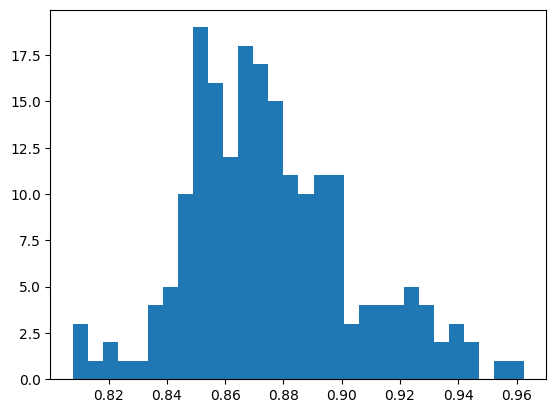

In [73]:
plt.hist(dot_prod_values, bins=30);

In [79]:
np.sum(np.array(dot_prod_values)>0.84) / len(dot_prod_values)

0.93

It seems that most of the kaggle questions really are scientific.

In [61]:
csv.head()

,prompt,A,B,C,D,E,answer,prompt_joined,embd_prompt,wiki_context
id,,,,,,,,,,
0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that explains the missing bar...,MOND is a theory that eliminates the observed ...,C,Which of the following statements accurately d...,"[-0.008270629, 0.006298679, -0.016664745, 0.02...",Context from page 0: \n{{DISPLAYTITLE:f(R) gra...
1,Which of the following is an accurate definiti...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the evolution of sel...,D,Which of the following is an accurate definiti...,"[-0.0023720644, 0.014086207, 0.011235354, 0.01...",Context from page 0: \nSimilitude is a concept...
2,Which of the following statements accurately d...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,D,Which of the following statements accurately d...,"[-0.014039354, -0.0063830204, 0.008411448, -0....",Context from page 0: \nCaput medusae is the ap...
3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,A,What is the significance of regularization in ...,"[0.007066282, 0.007916889, 0.026408227, 0.0198...","Context from page 0: \nIn physics, a renormal..."
4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,E,Which of the following statements accurately d...,"[-0.0073350007, -0.0017528787, 0.0033980804, -...",Context from page 0: \nThe angular aperture of...


In [62]:
csv['new_prompt'] = csv[['prompt', 'wiki_context']].apply(lambda x: x['prompt'] + "\n" + x['wiki_context'], axis=1)
csv.sample(1)['new_prompt'].values[0]

'What is the second law of thermodynamics?\nContext from page 0: \nIn classical thermodynamics, entropy is a property of a thermodynamic system that expresses the direction or outcome of spontaneous changes in the system. The term was introduced by Rudolf Clausius in the mid-nineteenth century from the Greek word τρoπή (transformation) to explain the relationship of the internal energy that is available or unavailable for transformations in form of heat and work. Entropy predicts that certain processes are irreversible or impossible, despite not violating the conservation of energy. The definition of entropy is central to the establishment of the second law of thermodynamics, which states that the entropy of isolated systems cannot decrease with time, as they always tend to arrive at a state of thermodynamic equilibrium, where the entropy is highest. Entropy is therefore also considered to be a measure of disorder in the system.\n\nLudwig Boltzmann explained the entropy as a measure of

In [63]:
csv['prompt'] = csv['new_prompt']

# Train-test split

In [64]:
n = 10
train_csv = csv.head(-n).reset_index(drop=True)
test_csv = csv.tail(n).reset_index(drop=True)

In [65]:
train_csv.tail()

,prompt,A,B,C,D,E,answer,prompt_joined,embd_prompt,wiki_context,new_prompt
185,What is the Kelvin-Helmholtz instability and h...,The Kelvin-Helmholtz instability is a phenomen...,The Kelvin-Helmholtz instability is a phenomen...,The Kelvin-Helmholtz instability is a phenomen...,The Kelvin-Helmholtz instability is a phenomen...,The Kelvin-Helmholtz instability is a phenomen...,D,What is the Kelvin-Helmholtz instability and h...,"[-0.04410997, 0.036128, -0.009809761, 0.015872...","Context from page 0: \nIn astrophysics, a bow ...",What is the Kelvin-Helmholtz instability and h...
186,What is the significance of the high degree of...,The high degree of fatty-acyl disorder in the ...,The high degree of fatty-acyl disorder in the ...,The high degree of fatty-acyl disorder in the ...,The high degree of fatty-acyl disorder in the ...,The high degree of fatty-acyl disorder in the ...,E,What is the significance of the high degree of...,"[-0.014851855, -0.0110502485, 0.024871988, 0.0...",Context from page 0: \nChloroplasts contain se...,What is the significance of the high degree of...
187,What is the explanation for the effective supe...,Two different color charges close together app...,Two different color charges close together app...,Two different color charges close together app...,Two different color charges close together app...,Two different color charges close together app...,C,What is the explanation for the effective supe...,"[-0.00106749, -0.02040491, -0.006127452, -0.00...","Context from page 0: \nIn particle physics, th...",What is the explanation for the effective supe...
188,What is the relationship between the complete ...,The complete electromagnetic Hamiltonian of an...,The complete electromagnetic Hamiltonian of an...,The complete electromagnetic Hamiltonian of an...,The complete electromagnetic Hamiltonian of an...,The complete electromagnetic Hamiltonian of an...,C,What is the relationship between the complete ...,"[-0.019851033, 0.0025825351, -0.019367397, -0....",Context from page 0: \nMany quantum mechanical...,What is the relationship between the complete ...
189,What is the difference between active and pass...,Active transport and passive transport both re...,Active transport and passive transport are bot...,Passive transport requires energy input from t...,Passive transport is powered by the arithmetic...,Active transport is powered by the arithmetic ...,D,What is the difference between active and pass...,"[-0.005162584, 0.014045654, -0.024387522, 0.00...",Context from page 0: \nPhloem loading is the p...,What is the difference between active and pass...


In [66]:
test_csv.head()

,prompt,A,B,C,D,E,answer,prompt_joined,embd_prompt,wiki_context,new_prompt
0,What is the Heisenberg uncertainty principle a...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,C,What is the Heisenberg uncertainty principle a...,"[-0.019385284, -0.0038585549, -0.0003422494, 0...","Context from page 0: \nIn the Standard Model, ...",What is the Heisenberg uncertainty principle a...
1,What is the difference between natural convect...,Natural convection and forced convection are t...,Natural convection and forced convection are t...,Natural convection is when a fluid is forced t...,Natural convection occurs when a fluid is in c...,Natural convection and forced convection are t...,D,What is the difference between natural convect...,"[-0.022604022, 0.019592354, -0.015304076, 0.00...",Context from page 0: \nThe difference between ...,What is the difference between natural convect...
2,What is magnetic susceptibility?\nContext from...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,E,What is magnetic susceptibility? Magnetic susc...,"[0.0038337691, 0.009627572, -0.031247392, 0.00...",Context from page 0: \nFor many paramagnetic m...,What is magnetic susceptibility?\nContext from...
3,"What is a transient condensation cloud, also k...",A visible cloud of smoke that forms when a nuc...,A visible cloud of gas that forms when a nucle...,A visible cloud of microscopic water droplets ...,A visible cloud of microscopic water droplets ...,A visible cloud of smoke that forms when a nuc...,D,"What is a transient condensation cloud, also k...","[0.0064468333, -0.0010157891, 0.011831308, 0.0...",Context from page 0: \nCloud physics is the st...,"What is a transient condensation cloud, also k..."
4,What is a uniform tiling in the hyperbolic pla...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is an...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is an...,C,What is a uniform tiling in the hyperbolic pla...,"[0.008315137, 0.013878238, -0.0057667415, -0.0...","Context from page 0: \nIn geometry, an apeirog...",What is a uniform tiling in the hyperbolic pla...


In [67]:
test_csv.index = list(range(len(test_csv)))
test_csv.index.name = "id"
test_csv.head()

,prompt,A,B,C,D,E,answer,prompt_joined,embd_prompt,wiki_context,new_prompt
id,,,,,,,,,,,
0,What is the Heisenberg uncertainty principle a...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,The Heisenberg uncertainty principle states th...,C,What is the Heisenberg uncertainty principle a...,"[-0.019385284, -0.0038585549, -0.0003422494, 0...","Context from page 0: \nIn the Standard Model, ...",What is the Heisenberg uncertainty principle a...
1,What is the difference between natural convect...,Natural convection and forced convection are t...,Natural convection and forced convection are t...,Natural convection is when a fluid is forced t...,Natural convection occurs when a fluid is in c...,Natural convection and forced convection are t...,D,What is the difference between natural convect...,"[-0.022604022, 0.019592354, -0.015304076, 0.00...",Context from page 0: \nThe difference between ...,What is the difference between natural convect...
2,What is magnetic susceptibility?\nContext from...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,Magnetic susceptibility is a measure of how mu...,E,What is magnetic susceptibility? Magnetic susc...,"[0.0038337691, 0.009627572, -0.031247392, 0.00...",Context from page 0: \nFor many paramagnetic m...,What is magnetic susceptibility?\nContext from...
3,"What is a transient condensation cloud, also k...",A visible cloud of smoke that forms when a nuc...,A visible cloud of gas that forms when a nucle...,A visible cloud of microscopic water droplets ...,A visible cloud of microscopic water droplets ...,A visible cloud of smoke that forms when a nuc...,D,"What is a transient condensation cloud, also k...","[0.0064468333, -0.0010157891, 0.011831308, 0.0...",Context from page 0: \nCloud physics is the st...,"What is a transient condensation cloud, also k..."
4,What is a uniform tiling in the hyperbolic pla...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is an...,A uniform tiling in the hyperbolic plane is a ...,A uniform tiling in the hyperbolic plane is an...,C,What is a uniform tiling in the hyperbolic pla...,"[0.008315137, 0.013878238, -0.0057667415, -0.0...","Context from page 0: \nIn geometry, an apeirog...",What is a uniform tiling in the hyperbolic pla...


In [68]:
out_dir = Path("../data/kaggle-llm-science-exam-test-context-splitted-w-wiki-context/")
out_dir.mkdir(exist_ok=False, parents=True)

train_csv.to_csv(out_dir / f"{file_name}_train.csv")
test_csv.to_csv(out_dir / f"{file_name}_test.csv")

In [69]:
out_dir

PosixPath('../data/kaggle-llm-science-exam-test-context-splitted-w-wiki-context')